# For loops vs List-comprehensions

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [13]:
def f1(x):
     return x * 2

def f2(x):
    return (2*x)
#    return (x**x)
def f3(x):
    return (x**2 + x**3 + x**4)

### f1 vs f2

N =  4000
Mean(For-loop_run_time/ List_run_time =  0.5726889287781826


<function matplotlib.pyplot.show(*args, **kw)>

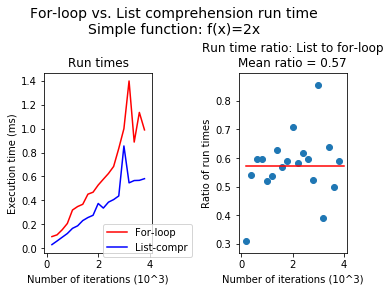

In [14]:
N = 4000
print("N = ", N)
DN = 200
x = range(DN, N, DN)
y1 = []
y2 = []
y3 = []
a = 1
nSamples = 0
meanRatio = 0

for i in range(DN, N, DN):
    t1 = timeit.default_timer()    
    multiples_of_two = []
    for k in range(0, i):
         multiples_of_two.append(f2(k))
        
    #multiples_of_two = [k * 2 for k in range(0, N)]
    t2 = timeit.default_timer()
        
    dt1 = 1000 * (t2 - t1)
    y1.append(dt1)
    
    t10 = timeit.default_timer()   
    
    multiples_of_two = []   
    multiples_of_two = [f2(k) for k in range(0, i)]
    
    #multiples_of_two2 = 0
    #for k in range(0, i):
         #multiples_of_two2 = f1(k)
    
    t20 = timeit.default_timer()
        
    dt2 = 1000 * (t20 - t10)
    y2.append(dt2)
    
    y3.append(dt2/dt1)
    
    nSamples = nSamples + 1
    meanRatio = meanRatio + dt2/dt1

meanRatio = meanRatio/nSamples
print("Mean(For-loop_run_time/ List_run_time = ", meanRatio)

# Two subplots, unpack the axes array immediately
#f, (ax1, ax2) = plt.subplots(1, 2)

x1 = []
for j in x:
    x1.append(j/1000)

plt.subplot(121)
plt.plot(x1, y1, color='r', label= "For-loop")
plt.plot(x1, y2, color='b', label= "List-compr")
plt.title('Run times')
plt.xlabel("Number of iterations (10^3)")
plt.ylabel('Execution time (ms)')
plt.xlim([-0.1, N/1000 + 0.1])
plt.legend(loc = 'lower left', bbox_to_anchor=(0.5, -0.05))

plt.subplot(122)
plt.scatter(x1, y3) 
plt.plot([DN/1000, N/1000], [meanRatio, meanRatio], color='r')
title2 = "Run time ratio: List to for-loop\nMean ratio = " + '{:04.2f}'.format(meanRatio)
plt.title(title2)
plt.xlabel("Number of iterations (10^3)")
plt.ylabel('Ratio of run times')
plt.xlim([-0.1, N/1000 + 0.1])

plt.suptitle("For-loop vs. List comprehension run time\nSimple function: f(x)=2x\n  ", fontsize=14)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.75)

plt.show


### f1 vs f3

N =  4000
Mean(For-loop_run_time/ List_run_time =  0.5901899334170144


<function matplotlib.pyplot.show(*args, **kw)>

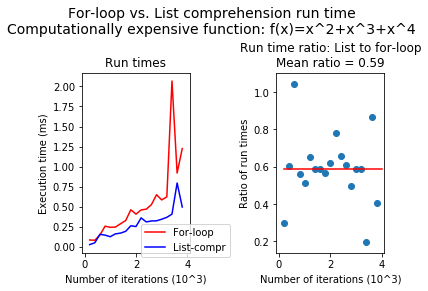

In [15]:
N = 4000
print("N = ", N)
DN = 200
x = range(DN, N, DN)
y1 = []
y2 = []
y3 = []
a = 1
nSamples = 0
meanRatio = 0

for i in range(DN, N, DN):
    t1 = timeit.default_timer()    
    multiples_of_two = []
    for k in range(0, i):
         multiples_of_two.append(f2(k))
        
    t2 = timeit.default_timer()
        
    dt1 = 1000 * (t2 - t1)
    y1.append(dt1)
    
    t10 = timeit.default_timer()   
    
    multiples_of_two = []   
    multiples_of_two = [f2(k) for k in range(0, i)]
    
    t20 = timeit.default_timer()
        
    dt2 = 1000 * (t20 - t10)
    y2.append(dt2)
    
    y3.append(dt2/dt1)
    
    nSamples = nSamples + 1
    meanRatio = meanRatio + dt2/dt1

meanRatio = meanRatio/nSamples
print("Mean(For-loop_run_time/ List_run_time = ", meanRatio)

x1 = []
for j in x:
    x1.append(j/1000)

plt.subplot(121)
plt.plot(x1, y1, color='r', label= "For-loop")
plt.plot(x1, y2, color='b', label= "List-compr")
plt.title('Run times')
plt.xlabel("Number of iterations (10^3)")
plt.ylabel('Execution time (ms)')
plt.xlim([-0.1, N/1000 + 0.1])
plt.legend(loc = 'lower left', bbox_to_anchor=(0.5, -0.05))

plt.subplot(122)
plt.scatter(x1, y3) 
plt.plot([DN/1000, N/1000], [meanRatio, meanRatio], color='r')
title2 = "Run time ratio: List to for-loop\nMean ratio = " + '{:04.2f}'.format(meanRatio)
plt.title(title2)
plt.xlabel("Number of iterations (10^3)")
plt.ylabel('Ratio of run times')
plt.xlim([-0.1, N/1000 + 0.1])

plt.suptitle("For-loop vs. List comprehension run time\nComputationally expensive function: f(x)=x^2+x^3+x^4\n  ", fontsize=14)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.75)

plt.show

## Conclusion
#### When the function gets more complicated, the difference between for loops and List-compr are reducing.
#### But List-compr still better than for loops.
#### Thats because A cycle comprehension, a single syntactic analysis is performed and the whole process is done with functions at the binary level (by the interpreter). In a loop, you have several steps, which are also repeated and imply greater load at the binary level.

https://stackoverflow.com/questions/30245397/why-is-a-list-comprehension-so-much-faster-than-appending-to-a-list/30245465#30245465

https://www.python.org/doc/essays/list2str/

https://www.linkedin.com/pulse/list-comprehension-python-always-faster-than-alex-falkovskiy

